In [357]:
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve

In [359]:
df = pd.read_csv("Downloads/train_LZdllcl.csv")

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [361]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [362]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [363]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [364]:
# storing the promoted employee data in seperate df
df_1 = df[df['is_promoted']==1]

In [365]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

### Filling Null values

In [ ]:
###########################

In [369]:
# applying ffill() method to fill the missing values with forward not NAN values
df['education'].ffill(axis = 0, inplace=True)

In [ ]:
##############################

In [370]:
# df['education'] = df['education'].fillna('Other')

# fill previous year rating nulls as 0 assuming they are new employeees for the company
df['previous_year_rating'] = df['previous_year_rating'].fillna(0)

### Encoding categorical features

In [372]:
def edu_encoder(row_value):

    if row_value == 'Below Secondary':
        return 0
    elif row_value == 'Other':
        return 1
    elif row_value == "Bachelor's":
        return 2
    elif row_value == "Master's & above":
        return 3
    

  
ordinal_department = df.groupby('department')['is_promoted'].mean().sort_values().index
ord_dept = {j:i for i,j in enumerate(ordinal_department)}
df['department'] = df['department'].map(ord_dept)


region_count = dict(df['region'].value_counts())
df['region'] = df['region'].map(region_count)


df['education'] = df['education'].apply(edu_encoder)    

df['gender'] = df['gender'].apply(lambda x: 0 if x=='f' else 1)


df = pd.get_dummies(df, drop_first=True)

df.set_index('employee_id', inplace=True)

In [373]:
df

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,
65438,3,4843,3,0,1,35,5.0,8,1,0,49,0,0,1
65141,5,6428,2,1,1,30,5.0,4,0,0,60,0,0,0
7513,3,874,2,1,1,34,3.0,7,0,0,50,0,0,1
2542,3,1175,2,1,2,39,1.0,10,0,0,50,0,0,0
48945,8,2260,2,1,1,45,3.0,2,0,0,73,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,8,827,2,1,1,48,3.0,17,0,0,78,0,0,1
74592,5,1659,3,0,1,37,2.0,6,0,0,56,0,0,0
13918,6,610,2,1,1,27,5.0,3,1,0,79,0,0,0


### Train Test "Before" Oversample

In [374]:
from sklearn.model_selection import train_test_split

x = df.drop('is_promoted', axis=1)
y = df['is_promoted']


x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x, y, test_size=0.30, random_state=10, stratify=y)


### normalisation of data ###
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_b_s = scaler.fit_transform(x_train_b)
x_test_b_s = scaler.transform(x_test_b)

### Oversampling

In [375]:
from imblearn.over_sampling import RandomOverSampler

# Define undersample strategy
oversample = RandomOverSampler()

# Fit and apply the transform
x_over, y_over = oversample.fit_resample(x, y)
x_over.index = oversample.sample_indices_

### Train Test "After" Oversample

In [376]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.35, random_state=10)

### Normalization

In [377]:
### normalisation of data ###
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [378]:
x_train_b_s

array([[0.375     , 0.13222872, 0.66666667, ..., 0.15      , 0.        ,
        0.        ],
       [1.        , 0.09291748, 1.        , ..., 0.63333333, 0.        ,
        1.        ],
       [0.625     , 1.        , 0.66666667, ..., 0.26666667, 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.66666667, ..., 0.7       , 0.        ,
        1.        ],
       [0.        , 0.39083821, 1.        , ..., 0.91666667, 0.        ,
        0.        ],
       [1.        , 0.39083821, 0.66666667, ..., 0.7       , 0.        ,
        0.        ]])

In [379]:
x_train_s

array([[1.        , 0.15464587, 0.66666667, ..., 0.6       , 0.        ,
        0.        ],
       [0.875     , 0.22555231, 1.        , ..., 0.56666667, 0.        ,
        0.        ],
       [0.625     , 0.5195744 , 0.66666667, ..., 0.56666667, 0.        ,
        0.        ],
       ...,
       [0.125     , 0.10453216, 1.        , ..., 0.18333333, 0.        ,
        0.        ],
       [0.875     , 0.0621345 , 1.        , ..., 0.58333333, 0.        ,
        0.        ],
       [0.125     , 1.        , 1.        , ..., 0.43333333, 0.        ,
        1.        ]])

## XGBOOST

In [158]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

clf=xgboost.XGBClassifier()
random_search=GridSearchCV(clf, param_grid=params, scoring='f1', n_jobs=-1,cv=2,verbose=3)

random_search.fit(x_train_b_s, y_train_b)

print(random_search.best_params_)
print(random_search.best_score_)

Fitting 2 folds for each of 3840 candidates, totalling 7680 fits
{'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.25, 'max_depth': 8, 'min_child_weight': 3}
0.5086719218993339


In [160]:
params_1={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

clf_1=xgboost.XGBClassifier()
random_search_1=GridSearchCV(clf, param_grid=params_1, scoring='f1', n_jobs=-1,cv=2,verbose=3)

random_search_1.fit(x_train_s, y_train)

print(random_search_1.best_params_)
print(random_search_1.best_score_)

Fitting 2 folds for each of 3840 candidates, totalling 7680 fits
{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 15, 'min_child_weight': 1}
0.9468189784218133


In [ ]:
# Train Before over and scaling
# {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.25, 'max_depth': 8, 'min_child_weight': 3}


# train after over sample and scale
# {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 15, 'min_child_weight': 1}

In [161]:
xgb =xgboost.XGBClassifier(**{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 15, 'min_child_weight': 1})

xgb.fit(x_train_s, y_train)

y_pred_after = xgb.predict(x_test_s)

In [162]:
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     17573
           1       0.95      1.00      0.97     17525

    accuracy                           0.97     35098
   macro avg       0.97      0.97      0.97     35098
weighted avg       0.97      0.97      0.97     35098



In [163]:
y_pred_before = xgb.predict(x_test_b_s)

print(classification_report(y_test_b, y_pred_before))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15043
           1       0.77      0.97      0.86      1400

    accuracy                           0.97     16443
   macro avg       0.88      0.97      0.92     16443
weighted avg       0.98      0.97      0.97     16443



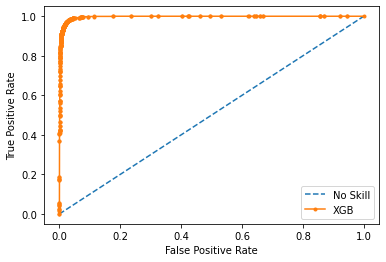

In [244]:
yhat = xgb.predict_proba(x_test_b_s)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_b, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='XGB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [262]:
new_p = pd.Series(yhat>0.82).astype(int).values

print(classification_report(y_test_b, new_p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15043
           1       0.93      0.90      0.92      1400

    accuracy                           0.99     16443
   macro avg       0.96      0.95      0.95     16443
weighted avg       0.99      0.99      0.99     16443



## Saving the Model

In [167]:
import joblib

# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(xgb, filename)         # saved in C/User/ritik/
 
# some time later...
 
# load the model from disk
# loaded_model = joblib.load(filename)

['finalized_model.sav']

# Predicting on Test file

In [387]:
test_df = pd.read_csv("Downloads/test_2umaH9m.csv")

test_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [388]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [389]:
# test_df['education'] = test_df['education'].fillna('Other')

test_df['education'].ffill(axis=0, inplace=True)

# fill previous year rating nulls as 0 assuming they are new employeees for the company
test_df['previous_year_rating'] = test_df['previous_year_rating'].fillna(0)

In [390]:
test_df['department'] = test_df['department'].map(ord_dept)

test_df['region'] = test_df['region'].map(region_count)

test_df['education'] = test_df['education'].apply(edu_encoder)    

test_df['gender'] = test_df['gender'].apply(lambda x: 0 if x=='f' else 1)



In [391]:
test_df_1 = pd.get_dummies(test_df, drop_first=True)
test_df_1.set_index('employee_id', inplace=True)

test_df_1

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,
8724,8,2260,2,1,1,24,0.0,1,1,0,77,0,1
74430,1,1703,2,0,1,31,3.0,5,0,0,51,0,0
72255,3,2648,2,1,1,31,1.0,4,0,0,47,0,0
38562,7,12343,2,0,3,31,2.0,9,0,0,65,0,0
64486,4,994,2,1,1,30,4.0,7,0,0,61,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53478,0,12343,0,1,1,24,3.0,1,0,0,61,0,1
25600,8,819,2,1,1,31,3.0,7,0,0,74,0,1
45409,1,1465,2,0,1,26,4.0,4,0,0,50,0,1


In [392]:
x_test = scaler.transform(test_df_1)

In [186]:
y_pred = xgb.predict(x_test)

In [191]:
pd.Series(y_pred).value_counts()

0    21319
1     2171
dtype: int64

In [198]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [393]:
test_df_1.index

Int64Index([ 8724, 74430, 72255, 38562, 64486, 46232, 54542, 67269, 66174,
            76303,
            ...
            11837, 78278, 27284, 49291, 47537, 53478, 25600, 45409,  1186,
             5973],
           dtype='int64', name='employee_id', length=23490)

In [201]:
test_result_df = pd.DataFrame(y_pred, test_df_1.index)

In [204]:
test_result_df.to_csv("C:/Users/ritik/result_file.csv")

In [16]:
############################################################# END

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,3,0,1,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,2,1,0,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,2,1,1,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,2,1,0,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,2,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,2,1,1,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,3,0,0,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,2,1,0,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,0,1,1,1,29,1.0,2,0,0,45,0


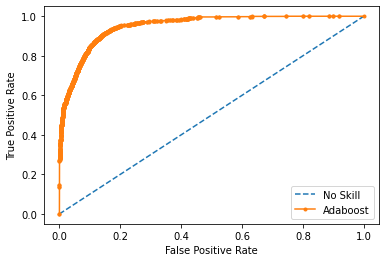

In [266]:
yhat = AB.predict_proba(x_test_b_s)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_b, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Adaboost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [22]:
# !pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [57]:
# Naive bayes
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, classification_report


In [270]:
# ###########

dt_param = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001, 0.0056],
              'max_depth' : [7, 9, 12, 15, 17, 20],
              'criterion' :['gini', 'entropy']
             }

gs_dt = RandomizedSearchCV(DecisionTreeClassifier(), dt_param, n_iter=10, cv=2, scoring='f1').fit(x_train_s, y_train)

print(gs_dt.best_params_)

print(gs_dt.best_score_)

C:\Users\ritik\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ritik\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


{'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy', 'ccp_alpha': 0.001}
0.8021270338785043


In [271]:
# #############

rf_param = {
    'n_estimators': [70, 120, 170, 220],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, 12, 15],
    'max_leaf_nodes': [3, 6, 9, 12],
}


gs_rf = RandomizedSearchCV(RandomForestClassifier(), rf_param, n_iter=10, cv=2, scoring='f1').fit(x_train_s, y_train)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'n_estimators': 170, 'max_leaf_nodes': 12, 'max_features': None, 'max_depth': 15}
0.814229616816125


In [275]:
# ############

sv_param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'sigmoid', 'poly']} 


gs_sv = RandomizedSearchCV(SVC(), sv_param, n_iter=5, cv=2, n_jobs=-1, scoring='f1').fit(x_train_s, y_train)

print(gs_sv.best_params_)
print(gs_sv.best_score_)

{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}
0.7870646229660752


In [311]:
y_pred_voting  = vot_hard.predict_proba(x_test_b_s)[:, 1]

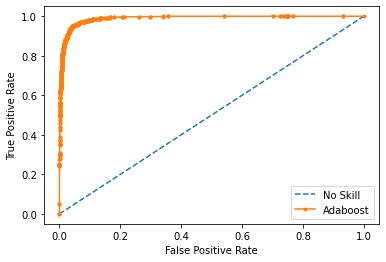

In [290]:
# keep probabilities for the positive outcome only

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_b, y_pred_voting)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Adaboost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

array([1.99403124, 0.99403124, 0.94924931, 0.94924513, 0.87104051,
       0.87091674, 0.86876315, 0.86702004, 0.86539567, 0.8653242 ,
       0.86401461, 0.86397898, 0.85190885, 0.85158343, 0.84713411,
       0.84701824, 0.84543724, 0.84515874, 0.8449098 , 0.84490665,
       0.84311657, 0.84281199, 0.83420515, 0.83418509, 0.83257593,
       0.83254893, 0.82883166, 0.82868618, 0.82747184, 0.82741937,
       0.82417558, 0.82417134, 0.817042  , 0.81698574, 0.814144  ,
       0.81385738, 0.80952439, 0.80938868, 0.80631114, 0.80629226,
       0.80397075, 0.80393328, 0.80134019, 0.80124873, 0.80054044,
       0.80027527, 0.80020846, 0.80017279, 0.80010588, 0.79994316,
       0.79922481, 0.79921252, 0.79720472, 0.79719591, 0.79691698,
       0.79684952, 0.7948643 , 0.79486114, 0.79333225, 0.79315279,
       0.79088481, 0.79079619, 0.790786  , 0.79073417, 0.78944891,
       0.78921865, 0.78865112, 0.78835595, 0.78752966, 0.78712378,
       0.78711624, 0.78704959, 0.78675716, 0.78664789, 0.78640

#### Trying Light GBM and Catboost and XGboost and Random forest together as voting classifier

In [324]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [325]:
import lightgbm as lgb

# LightGBM

rs_params = {
        'bagging_fraction': (0.1, 0.3, 0.5, 0.8),
        'bagging_frequency': (5, 8, 10, 12, 15),
        'feature_fraction': (0.5, 0.8, 0.3),
        'max_depth': (10, 13, 8, 15, 6),
        'min_data_in_leaf': (90, 120, 50, 150),
        'num_leaves': (1200, 1550, 1000, 1860)
}

# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), param_distributions=rs_params, cv = 2, scoring='f1', n_iter=30,verbose=3)
rs_cv.fit(x_train_s, y_train)

print(rs_cv.best_params_)
print(rs_cv.best_score_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[CV 1/2] END bagging_fraction=0.3, bagging_frequency=10, feature_fraction=0.8, max_depth=6, min_data_in_leaf=120, num_leaves=1550;, score=0.851 total time=   0.8s
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.

In [326]:
! pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [327]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from catboost import CatBoostClassifier


# search best parameter and model
model = CatBoostClassifier()
parameters = {'depth'         : sp_randInt(1, 10),
              'learning_rate' : sp_randFloat(),
              'iterations'    : sp_randInt(10, 100)
             }

rs = RandomizedSearchCV(estimator=model, 
                           param_distributions = parameters,
                           scoring='f1',
                           cv = 2, 
                           n_iter = 20, 
                           n_jobs=-1)
rs.fit(x_train_s, y_train)

# best model 
print(rs.best_params_)
print(rs.best_score_)

C:\Users\ritik\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ritik\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ritik\AppData\Roaming\Python\Python39\site-packages\catboost\core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\ritik\AppData

0:	learn: 0.4696566	total: 152ms	remaining: 9.55s
1:	learn: 0.4088981	total: 167ms	remaining: 5.17s
2:	learn: 0.3814370	total: 181ms	remaining: 3.68s
3:	learn: 0.3724886	total: 195ms	remaining: 2.92s
4:	learn: 0.3648621	total: 208ms	remaining: 2.46s
5:	learn: 0.3567491	total: 222ms	remaining: 2.14s
6:	learn: 0.3470856	total: 237ms	remaining: 1.93s
7:	learn: 0.3390807	total: 251ms	remaining: 1.76s
8:	learn: 0.3362012	total: 266ms	remaining: 1.63s
9:	learn: 0.3337514	total: 279ms	remaining: 1.51s
10:	learn: 0.3309268	total: 294ms	remaining: 1.42s
11:	learn: 0.3274218	total: 309ms	remaining: 1.34s
12:	learn: 0.3231572	total: 324ms	remaining: 1.27s
13:	learn: 0.3195294	total: 344ms	remaining: 1.23s
14:	learn: 0.3167942	total: 360ms	remaining: 1.18s
15:	learn: 0.3150134	total: 373ms	remaining: 1.12s
16:	learn: 0.3117415	total: 387ms	remaining: 1.07s
17:	learn: 0.3088775	total: 401ms	remaining: 1.02s
18:	learn: 0.3070291	total: 418ms	remaining: 990ms
19:	learn: 0.3045925	total: 431ms	remaini

In [330]:
param_dist = {"max_depth": [3, 5], 
    "max_features": sp_randInt(1, 11), 
    "min_samples_split": sp_randInt(2, 11), 
    "bootstrap": [True, False], 
    "criterion": ["gini", "entropy"]} 


# build a classifier 
clf = RandomForestClassifier(n_estimators=180)
# Randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, 
    n_iter=5, cv=2, n_jobs=-1) 

random_search.fit(x_train_s, y_train)

print(random_search.best_params_)
print(random_search.best_score_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_split': 4}
0.7675585284280937


In [331]:
algo_lst = []


algo_lst.append(('xgb', xgboost.XGBClassifier(**{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 15, 'min_child_weight': 1})))
algo_lst.append(('lgb', lgb.LGBMClassifier(**{'num_leaves': 1200, 'min_data_in_leaf': 50, 'max_depth': 15, 'feature_fraction': 0.8, 'bagging_frequency': 10, 'bagging_fraction': 0.5})))
algo_lst.append(('cb', CatBoostClassifier(**{'depth': 8, 'iterations': 64, 'learning_rate': 0.9652644941176821})))
algo_lst.append(('rfc', RandomForestClassifier(**{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_split': 4})))


In [332]:
vot_hard = VotingClassifier(estimators = algo_lst, voting ='soft')
vot_hard.fit(x_train_s, y_train)
y_pred = vot_hard.predict(x_test_b_s)

f1_score_ = f1_score(y_test_b, y_pred)

print(f1_score_)

print(classification_report(y_test_b, y_pred))

0:	learn: 0.4696566	total: 16.3ms	remaining: 1.02s
1:	learn: 0.4088981	total: 31.8ms	remaining: 984ms
2:	learn: 0.3814370	total: 45.8ms	remaining: 930ms
3:	learn: 0.3724886	total: 59.9ms	remaining: 899ms
4:	learn: 0.3648621	total: 72.9ms	remaining: 860ms
5:	learn: 0.3567491	total: 86.3ms	remaining: 834ms
6:	learn: 0.3470856	total: 102ms	remaining: 831ms
7:	learn: 0.3390807	total: 119ms	remaining: 834ms
8:	learn: 0.3362012	total: 139ms	remaining: 850ms
9:	learn: 0.3337514	total: 157ms	remaining: 846ms
10:	learn: 0.3309268	total: 176ms	remaining: 847ms
11:	learn: 0.3274218	total: 191ms	remaining: 829ms
12:	learn: 0.3231572	total: 214ms	remaining: 839ms
13:	learn: 0.3195294	total: 235ms	remaining: 838ms
14:	learn: 0.3167942	total: 249ms	remaining: 815ms
15:	learn: 0.3150134	total: 263ms	remaining: 788ms
16:	learn: 0.3117415	total: 277ms	remaining: 766ms
17:	learn: 0.3088775	total: 292ms	remaining: 745ms
18:	learn: 0.3070291	total: 307ms	remaining: 727ms
19:	learn: 0.3045925	total: 321ms	r

### Light GB, XGB, Cat boost Model Saved as Voting classifier

In [354]:
# save the model to disk
filename = 'light_voting_model.sav'
joblib.dump(vot_hard, filename)         # saved in C/User/ritik/

['light_voting_model.sav']

In [ ]:
#############################################

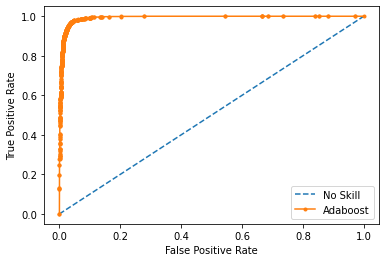

In [334]:
y_pred_prob = vot_hard.predict_proba(x_test_b_s)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_b, y_pred_prob)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Adaboost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [348]:
thresh_y = pd.Series(y_pred_prob>0.70).astype(int).values

print(classification_report(y_test_b, thresh_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15043
           1       0.88      0.84      0.86      1400

    accuracy                           0.98     16443
   macro avg       0.93      0.91      0.92     16443
weighted avg       0.98      0.98      0.98     16443



In [353]:
y_pred_prob = vot_hard.predict_proba(x_test)[:,1]

thresh_y = pd.Series(y_pred_prob>0.60).astype(int).values

res = pd.DataFrame(thresh_y, test_df_1.index)

res.to_csv("C:/Users/ritik/new_res.csv")

# New Voting Model after Fowrward fill method

In [383]:
algo_lst = []


algo_lst.append(('xgb', xgboost.XGBClassifier(**{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 15, 'min_child_weight': 1})))
algo_lst.append(('lgb', lgb.LGBMClassifier(**{'num_leaves': 1200, 'min_data_in_leaf': 50, 'max_depth': 15, 'feature_fraction': 0.8, 'bagging_frequency': 10, 'bagging_fraction': 0.5})))
algo_lst.append(('cb', CatBoostClassifier(**{'depth': 8, 'iterations': 64, 'learning_rate': 0.9652644941176821})))
algo_lst.append(('rfc', RandomForestClassifier(**{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_split': 4})))


vot_hard = VotingClassifier(estimators = algo_lst, voting ='soft')
vot_hard.fit(x_train_s, y_train)
y_pred = vot_hard.predict(x_test_b_s)


print(classification_report(y_test_b, y_pred))

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
0:	learn: 0.4688047	total: 48.2ms	remaining: 3.04s
1:	learn: 0.4100664	total: 80.7ms	remaining: 2.5s
2:	learn: 0.3782162	total: 115ms	remaining: 2.33s
3:	learn: 0.3706870	total: 147ms	remaining: 2.2s
4:	learn: 0.3645892	total: 181ms	remaining: 2.13s
5:	learn: 0.3546931	total: 205ms	remaining: 1.98s
6:	learn: 0.3497553	total: 228ms	remaining: 1.85s
7:	learn: 0.3441038	total: 254ms	remaining: 1.77s
8:	learn: 0.3403245	total: 274ms	remaining: 1.67s
9:	learn: 0.3359026	total: 300ms	remaining: 1.62s
10:	learn: 0.3312828	total: 322ms	remaining: 1.55s
11:	learn: 0.3251956	total: 

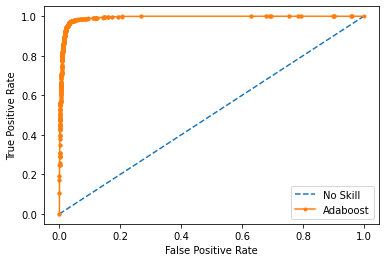

In [384]:
y_pred_prob = vot_hard.predict_proba(x_test_b_s)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_b, y_pred_prob)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Adaboost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [385]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_s, y_pred_prob)

0.992515883040047

In [403]:
y_pred_prob = vot_hard.predict_proba(x_test)[:,1]

thresh_y = pd.Series(y_pred_prob>0.70).astype(int).values

res = pd.DataFrame(thresh_y, test_df_1.index)

res.to_csv("C:/Users/ritik/n_voting.csv", header=['is_promoted'])

In [402]:
res

,0
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0
...,...
53478,0
25600,0
45409,0


In [404]:
knn_model = KNeighborsClassifier(11)
knn_model.fit(x_train_s, y_train)

knn_pred = knn.predict(x_test_b_s)

classification_report(y_test_b, knn_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [410]:
print(classification_report(y_test_b, knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     15043
           1       0.63      0.09      0.16      1400

    accuracy                           0.92     16443
   macro avg       0.77      0.54      0.56     16443
weighted avg       0.90      0.92      0.89     16443



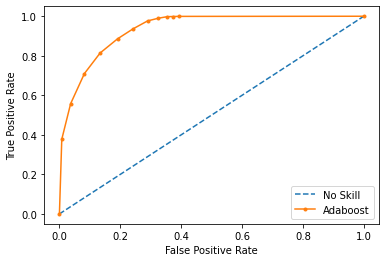

In [413]:
knn_proba = knn_model.predict_proba(x_test_b_s)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_b, knn_proba)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Adaboost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

## Final Summary:

#### This data is taken from Analytics vidhya

There is lot of stuff above and to give an overview of what i have done above is clearing the data and predicted whether an employee is promoted or not, for the predictions first feature engineering is very much needed then we also have to takle the imbalance class problems as the data for promoted employee is only 8% of total data, its quite difficult to predict class with such level of imbalance, we have used Oversampling technique to talke this, then scaled data using Normalisation technique and observing the data we have decided logistic regression cannot be a good choice given there is no correlation in any variables  also K Nearest neighbors is not so good as the size of data is large, we have choose to use tree based models like XGB, Adaboost, Random forest and also used Voting classfiers to use all models together with that note we also have recorded F1 of approx 0.80 in training set, also good ROC_AUC score we can adjust thresholds to tradeoff between True positive and False positives.

Further Improvements:
We can work more extensively on Feature Engineering, creating new features, using new updated techniques to fill missing values or encoding techniques, also we can try black box like model neural networks because it works well in non relational variables. 